In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import cm
import matplotlib.animation as animation
from pak.function import *
mindata = [79.48,66.95,77.66,77.66,66.71,65.87,92.94,98.62,65.61,59.13,76.27,56.61,
           68.42,77.31,70.03,71.35,69.83,119.54,71.69,71.29,124.08,51.57,85.39,93.30]
bounds = [(-5.0, 5.0), (-5.0, 5.0)]
yscale="log"

In [77]:
csv = 'Fn19S'  ######################
n_repeats = 1 ####################
n_calls = 300 #####################
n_initial_points = 30 #############
data=[]
func = F19 #####################################
true_minimum = mindata[18] #####################################
with open("Data\\"+csv+"_pre.csv","r") as file: ############
    count = 0
    for line in file:
        macoiter = count//n_calls # 实验序数
        iter = count-macoiter*n_calls # 迭代序数
        if iter<=n_calls:
            data.append([float(x) for x in line.strip().split(",")])
        count = count+1

In [73]:
x = np.arange(-5,5,0.01)
y = np.arange(-5,5,0.01)
n = len(x)
X,Y = np.meshgrid(x,y)
Z = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        Z[i][j] = func([X[i][j],Y[i][j]])

<a list of 1895 text.Text objects>

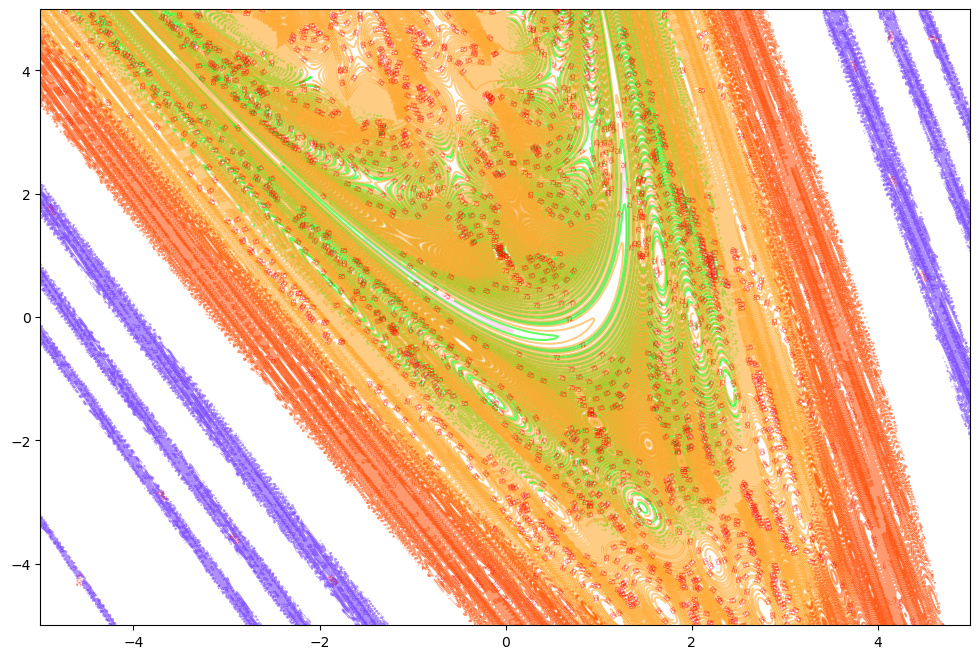

In [79]:
fig, ax = plt.subplots(figsize=(12,8))
scatter = ax.scatter([], [])
x_data = []
y_data = []
contour = ax.contour(X,Y,Z,[72,75,85,100,150,200,250,500],colors=['#FFB7DD', '#00FF00', '#FFAA33','#FF5511','#7744FF','#7744FF','#7744FF','#7744FF'],alpha=0.6,zorder=1)
ax.clabel(contour,fontsize=5,colors=('r'))

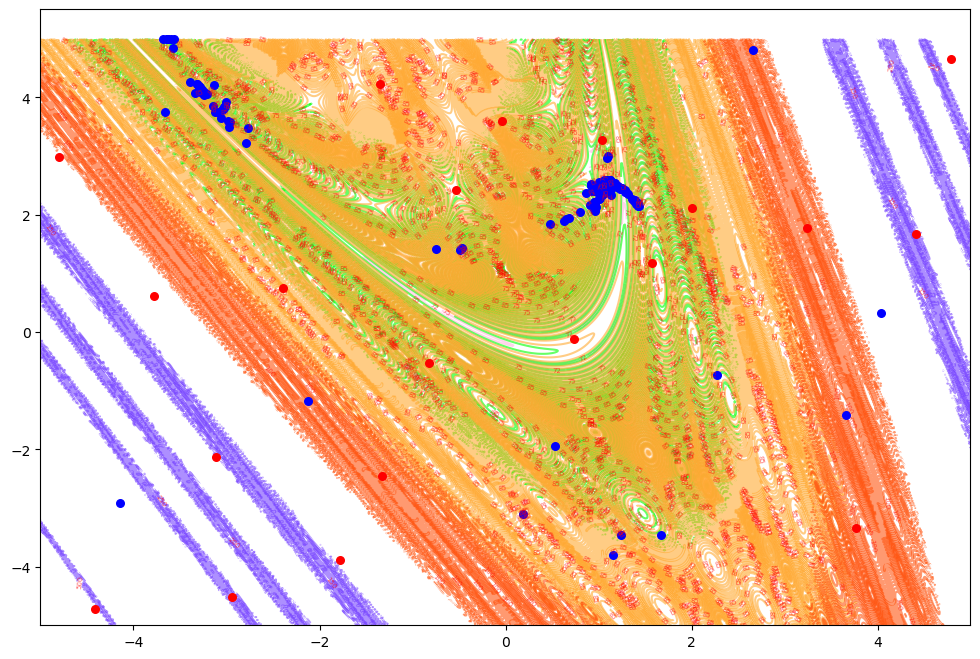

In [80]:
for d in data:
     x_data.append(d[0])
     y_data.append(d[1])
ax.scatter(x_data[:20], y_data[:20], color='red', marker='o', s=30, zorder=2)
ax.scatter(x_data[20:], y_data[20:], color='blue', marker='o', s=30, zorder=2)
fig

In [ ]:
def update(data):
    x_data.append(data[0])
    y_data.append(data[1])
    # 更新散点图的数据
    scatter.set_offsets(list(zip(x_data, y_data)))

    colors = ['r' if i <= n_initial_points else 'g' for i in range(len(x_data))]
    scatter.set_color(colors)
    

In [ ]:
ani = animation.FuncAnimation(fig, update, frames=data[0:300], interval=50)
ani.save('Fn19s_EI.gif', writer='pillow')
plt.show(ani)